# AI at the cutting edge of Medical Imaging

Artificial intelligence (AI) has seen incredible advances in recent years with applications in various fields, including healthcare. This report provides a thorough overview of the developments in image and video data processing in the field of medicine produced by the AI community. AI has completely changed medical imaging, diagnosis, and therapy by leveraging machine learning (ML) and deep learning (DL) methods.
We have extensively collected and carefully examined a wide range of research publications over the previous two years to present a thorough overview, focusing on the most recent trends in this dynamic field. Our main objective is to raise awareness about how AI can drastically improve the precision, effectiveness, and patient outcomes of medical imaging.
We address the developments in computer vision, exploring the latest methods like U-Nets, transfer learning, multi-modal image fusion, etc. These developments have made it possible to extract useful information from medical images, enabling the early diagnosis of diseases, the planning of personalised treatments, and image-guided therapies.
With the help of this report, we hope to provide a comprehensive overview of the major discoveries, developments, and trends in AI-driven image and video data processing in the medical industry. Understanding the advancements made in this rapidly developing field helps us to foresee the enormous opportunities and difficulties that lie ahead, ultimately paving the way for innovations in the field of medicine.


**The Motivation behind choosing Medical Imaging**

Medical imaging procedures like X-rays, CT scans, and MRIs can provide valuable insights about the interior organs and irregularities in the human body. We can improve the precision and effectiveness of diagnosis, resulting in prompt and successful therapies. The application of AI algorithms is well suited to the field of medicine because it produces enormous amounts of imaging data every day. Advanced techniques are needed to extract useful information from the volume and complexity of medical imaging data, which will help medical practitioners make precise clinical judgements. AI algorithms can find minute patterns or indicators in medical imaging that may be difficult for humans to see, enabling early intervention and individualized treatment programmes. Image-guided therapies and interventions can be facilitated by AI-based analysis of medical pictures. Minimally invasive operations are made possible by precise localization and mapping of anatomical structures or target locations within the body, which lowers risks and enhances patient safety. Medical imaging data can be combined with other patient information including genomic information and electronic health records (EHRs). By utilizing AI in image/video analysis, we may gain insightful knowledge by fusing imaging data with other patient-specific data, resulting in more thorough and individualized healthcare. We believe that the field of image/video analysis using AI finds its most useful application in the field of medicine, in assisting doctors and researchers as well as performing detailed tasks that humans are unable to perform themselves. We are immensely inspired by the recent innovations through AI in medical imaging and hence wish to highlight the recent advancements in the same.

# Dataset Collection

We collected the dataset by webscraping google scholar website using selenium for medical imaging ieee from 2021 to 2023. The dataset consists of Title, Year and Abstracts.

In [ ]:
'''import time
import os
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

driver_path = 'chromedriver_win32\\chromedriver.exe'
service = Service(driver_path)
driver = webdriver.Chrome(service=service)

# Initialize a list to store the extracted information
paper_info = []

while True:

    url = f"https://scholar.google.com/scholar?as_ylo=2021&as_yhi=2023&start=0&q=topic+modelling+site%3Aieeexplore.ieee.org"
    driver.get(url)
    # Find the list of research papers
    papers = driver.find_elements(By.CLASS_NAME, "gs_r.gs_or.gs_scl")
    # Filter out the unwanted paper
    papers = [paper for paper in papers if "gs_qsuggest_wrap" not in paper.get_attribute("class")]

    # Scrape the title, year, abstract, and DOI link of each research paper
    for paper in papers:
        # Find the appropriate elements to extract the desired information
        href = paper.find_element(By.CLASS_NAME, "gs_rt").find_element(By.TAG_NAME, "a").get_attribute("href")

        # Visit the link to extract additional information
        driver.get(href)

        title_element = driver.find_element(By.CLASS_NAME, "document-title.text-2xl-md-lh").find_element(By.TAG_NAME, "span")
        title = title_element.text
        print("Title:",title)

        # Extract the year
        wait = WebDriverWait(driver, 10)
        year_element = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, ".u-pb-1.doc-abstract-pubdate, .u-pb-1.doc-abstract-dateadded")))

        year = year_element.text
        year = year.split()[-1]
        print("Year:",year)

        # Extract the full abstracts
        full_abstract_elements = driver.find_elements(By.CLASS_NAME, "u-mb-1")
        abstracts = []
        for i in range(1, len(full_abstract_elements)):
            full_abstract_element = full_abstract_elements[i]
            full_abstract = full_abstract_element.text
            abstracts.append(full_abstract)
            print(full_abstract)

        # Store the extracted information in a dictionary
        paper_info.append({"Title": title, "Year": year, "Abstracts": abstract})

        driver.back()



    # Close the browser
    driver.quit()
    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(paper_info)

    # Save the DataFrame to a CSV file in append mode
    csv_file = 'scraped_data.csv'
    mode = 'a' if os.path.isfile(csv_file) else 'w'
    with open(csv_file, mode, newline='', encoding='utf-8') as file:
        df.to_csv(file, index=False, header=file.tell() == 0)'''

We saved the dataset into a csv and uploaded it to google drive, which we now imported to the colab notebook

In [5]:
import pandas as pd
file_path = '/kaggle/input/research-papers-medical-imaging/scraped_data.csv'
df = pd.read_csv(file_path)

In [6]:
df

,Title,Year,Abstracts
0,U-Net and Its Variants for Medical Image Segme...,2021,"[""Abstract:\nU-net is an image segmentation te..."
1,A Review of Deep Learning in Medical Imaging: ...,2021,"['Abstract:\nSince its renaissance, deep learn..."
2,Recent Advances in Sparse Representation Based...,2021,"['Abstract:\nMedical image fusion, which aims ..."
3,Automatic Medical Image Diagnosis: Highlights ...,2022,['Abstract:\nThe annual IEEE 5-Minute Video Cl...
4,DS-TransUNet: Dual Swin Transformer U-Net for ...,2022,['Abstract:\nAutomatic medical image segmentat...
...,...,...,...
875,PSO based Medical Image Enhancement for Qualit...,2023,['Abstract:\nThis work provides a particle swa...
876,Recurrent Tissue-Aware Network for Deformable ...,2021,['Abstract:\nDeformable registration is fundam...
877,Multi-Modal Imaging Genetics Data Fusion via a...,2022,['Abstract:\nRecent studies show that multi-mo...
878,Gesture Recognition in Robotic Surgery With Mu...,2022,['Abstract:\nAutomatically recognising surgica...


Analyzing Publications in Medical Imaging under the Machine Learning Sectore from 2021-2023

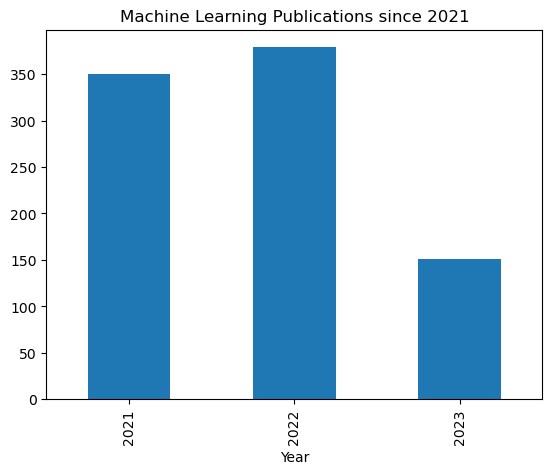

In [7]:
# Group the papers by year
groups = df.groupby("Year")

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')
plt.title("Machine Learning Publications since 2021")
plt.xlabel("Year");
print(groups,)

Processing Title to remove punctutations and convert to lowercase

In [ ]:
# Load the regular expression library
import re

# Print the titles of the first rows
print(df['Title'].head())

# Remove punctuation
df['title_processed'] = df['Title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['title_processed'] = df['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows
print(df['title_processed'].head())

Word Cloud for most used words in Title

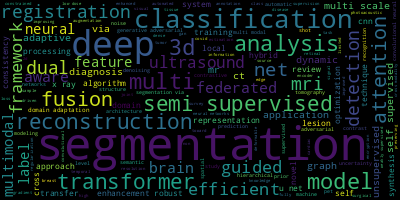

Processing Abstracts to remove punctutations and convert to lowercase

In [ ]:
# Load the regular expression library
import re
import pandas as pd

# Remove punctuation and brackets
df['Abstracts_processed'] = df['Abstracts'].map(lambda x: re.sub('[,\.!?]', '', x))
df['Abstracts_processed'] = df['Abstracts_processed'].map(lambda x: re.sub(r'^\[|\]$', '', x))

# Remove single quotes and double quotes
df['Abstracts_processed'] = df['Abstracts_processed'].map(lambda x: re.sub(r"['\"]", '', x))

for i in range(len(df)):
  df['Abstracts_processed'][i] = df['Abstracts_processed'][i][11:]

# Convert the abstracts to lowercase
df['Abstracts_processed'] = df['Abstracts_processed'].str.lower()

# Print the processed abstracts of the first rows
print(df['Abstracts_processed'].head())


Analyzing the type of models used in general

/tmp/ipykernel_28/4028582891.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df["Abstracts_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True) | \
/tmp/ipykernel_28/4028582891.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["title_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True)


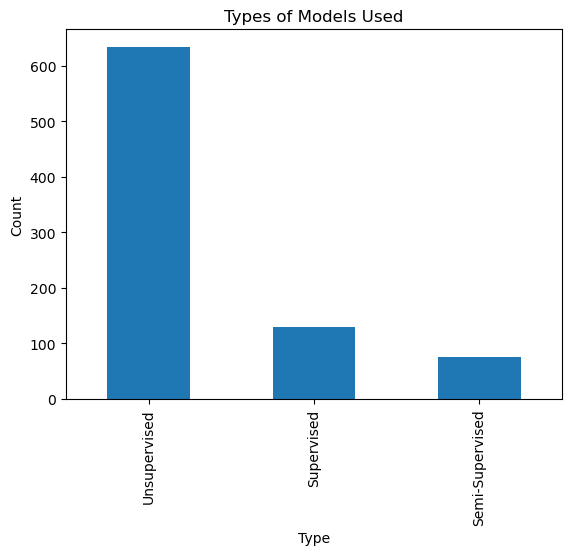

In [10]:
import matplotlib.pyplot as plt

# Create a boolean mask to filter rows based on the combined search condition
mask = df["Abstracts_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True) | \
       df["title_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True)

# Apply the mask to the DataFrame and count the occurrence of each type
type_counts = df[mask].apply(lambda x: "Semi-Supervised" if "semi" in x["Abstracts_processed"] or "semi" in x["title_processed"]
                                         else "Supervised" if "supervised" in x["Abstracts_processed"] or "supervised" in x["title_processed"]
                                         else "Unsupervised", axis=1).value_counts()

# Plot the counts as a bar plot
type_counts.plot(kind='bar')
plt.title("Types of Models Used")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


Extracting specific models used from abstracts and titles

In [11]:
import re
import pandas as pd

# Function to extract models or methods mentioned in the text
def extract_models(text):
    # Define patterns for common model or method names
    model_patterns = [
        r"U-Net",
        r"ResNet",
        r"GAN",
        r"SVM",
        r"DenseNet",
        r"VGGNet",
        r"InceptionNet",
        r"EfficientNet",
        r"MobileNet",
        r"V-Net",
        r"DeepLab",
        r"Mask R-CNN",
        r"R-CNN",
        r"NASNet",
        r"SE-Net",
        r"Xception",
        r"SR",
        r"Transformer",
        r"DS-TransUNet",
        r"MedMNIST",
        r"IoMT",
        r"DLaST",
        r"MED-MNIST",
        r"VinDr-CXR",
        r"DCAC",
        r"MAGAN"
    ]

    mentioned_models = []
    # Find matches of model patterns in the text
    for pattern in model_patterns:
        if re.search(pattern, text, flags=re.IGNORECASE):
            mentioned_models.append(pattern)

    return mentioned_models

# Create a new column 'Models_Used' to store the mentioned models
df['Models_Used'] = ""

# Extract and save the mentioned models for each abstract and title
for i, (abstract, title) in enumerate(zip(df['Abstracts_processed'], df['title_processed'])):
    abstract_models = extract_models(abstract)
    title_models = extract_models(title)
    all_models = abstract_models + title_models
    unique_models = list(set(all_models))
    if unique_models:
        df.at[i, 'Models_Used'] = ', '.join(unique_models)
    else:
        df.at[i, 'Models_Used'] = "NA"


In [12]:
df.head(5)

,Title,Year,Abstracts,title_processed,Abstracts_processed,Models_Used
0,U-Net and Its Variants for Medical Image Segme...,2021,"[""Abstract:\nU-net is an image segmentation te...",u-net and its variants for medical image segme...,u-net is an image segmentation technique devel...,U-Net
1,A Review of Deep Learning in Medical Imaging: ...,2021,"['Abstract:\nSince its renaissance, deep learn...",a review of deep learning in medical imaging: ...,since its renaissance deep learning (dl) has b...,NA
2,Recent Advances in Sparse Representation Based...,2021,"['Abstract:\nMedical image fusion, which aims ...",recent advances in sparse representation based...,medical image fusion which aims to combine mul...,SR
3,Automatic Medical Image Diagnosis: Highlights ...,2022,['Abstract:\nThe annual IEEE 5-Minute Video Cl...,automatic medical image diagnosis: highlights ...,the annual ieee 5-minute video clip contest (5...,GAN
4,DS-TransUNet: Dual Swin Transformer U-Net for ...,2022,['Abstract:\nAutomatic medical image segmentat...,ds-transunet: dual swin transformer u-net for ...,automatic medical image segmentation has made ...,"Transformer, DS-TransUNet, U-Net"


Plotting Graph to analyze most used models

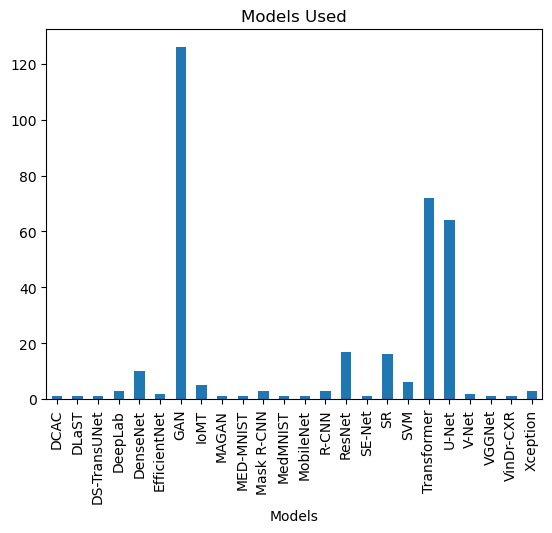

In [13]:
# Remove NA values and "NA" string from the "Models_Used" column
df_cleaned = df.dropna(subset=["Models_Used"])
df_cleaned = df_cleaned[df_cleaned["Models_Used"] != "NA"]

# Split multiple models into separate rows
df_split = df_cleaned.assign(Models_Used=df_cleaned["Models_Used"].str.split(", ")).explode("Models_Used")

# Group the papers by models used
groups = df_split.groupby("Models_Used")

# Determine the size of each group
counts = groups.size()

# Visualize the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')
plt.title("Models Used")
plt.xlabel("Models")
plt.show()


Analyzing the frequency of models used from 2021-2023

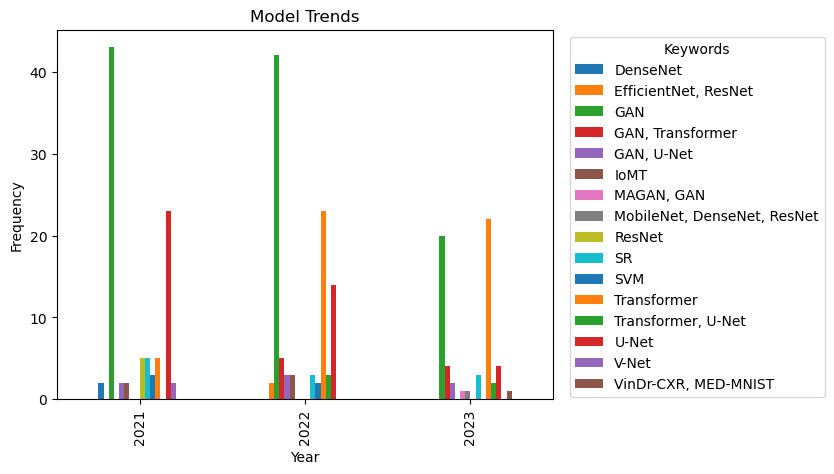

In [14]:
df = df.dropna(subset=["Models_Used"])
df = df[df["Models_Used"] != "NA"]

# Group the papers by publication year and count the frequency of specific keywords or topics
keyword_counts = df.groupby("Year")["Models_Used"].apply(lambda x: x.explode().value_counts().nlargest(10))

# Split multiple models into separate rows
df = df.assign(Models_Used=df_cleaned["Models_Used"].str.split(", ")).explode("Models_Used")

# Plot the keyword counts as a bar plot
ax = keyword_counts.unstack().plot(kind='bar')
plt.title("Model Trends")
plt.xlabel("Year")
plt.ylabel("Frequency")

# Move the legend to the right of the graph
plt.legend(title="Keywords", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.show()


Understanding how the maturity of research has increased over the years

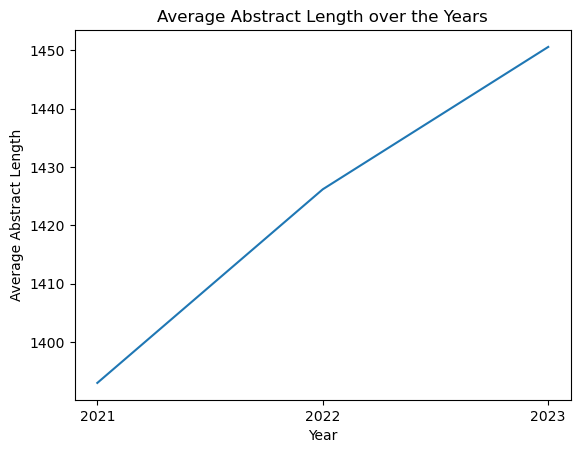

In [15]:
# Calculate the length of abstracts
df['Abstract_Length'] = df['Abstracts_processed'].str.len()

# Group the papers by publication year and calculate the average abstract length
average_length = df.groupby('Year')['Abstract_Length'].mean()

# Plot the average abstract length over the years
plt.plot(average_length.index, average_length.values)
plt.title('Average Abstract Length over the Years')
plt.xlabel('Year')
plt.ylabel('Average Abstract Length')

# Set the x-axis ticks and labels
plt.xticks(average_length.index)

plt.show()


The increase in abstract length over the years may be related to maturity of research papers. As the study progresses, researchers often tend to add more information to convey the significance, methodology, and conclusions of their work. Longer abstracts may indicate more comprehensive and mature research, as authors aim to provide a comprehensive overview of the contributions, significance, and potential impact of their research

# GAN

**Introduction**

---

**GANs (Generative Adversarial Networks)** have seen a lot of advancements and research over the recent years, with the most prominent being its application in the medical field. GANs are Generative networks that learn to generate believable images throughout their training and are then used to generate almost real data instances that can be used in applications where datasets are scarce or sample data is required.

**Architecture**

---

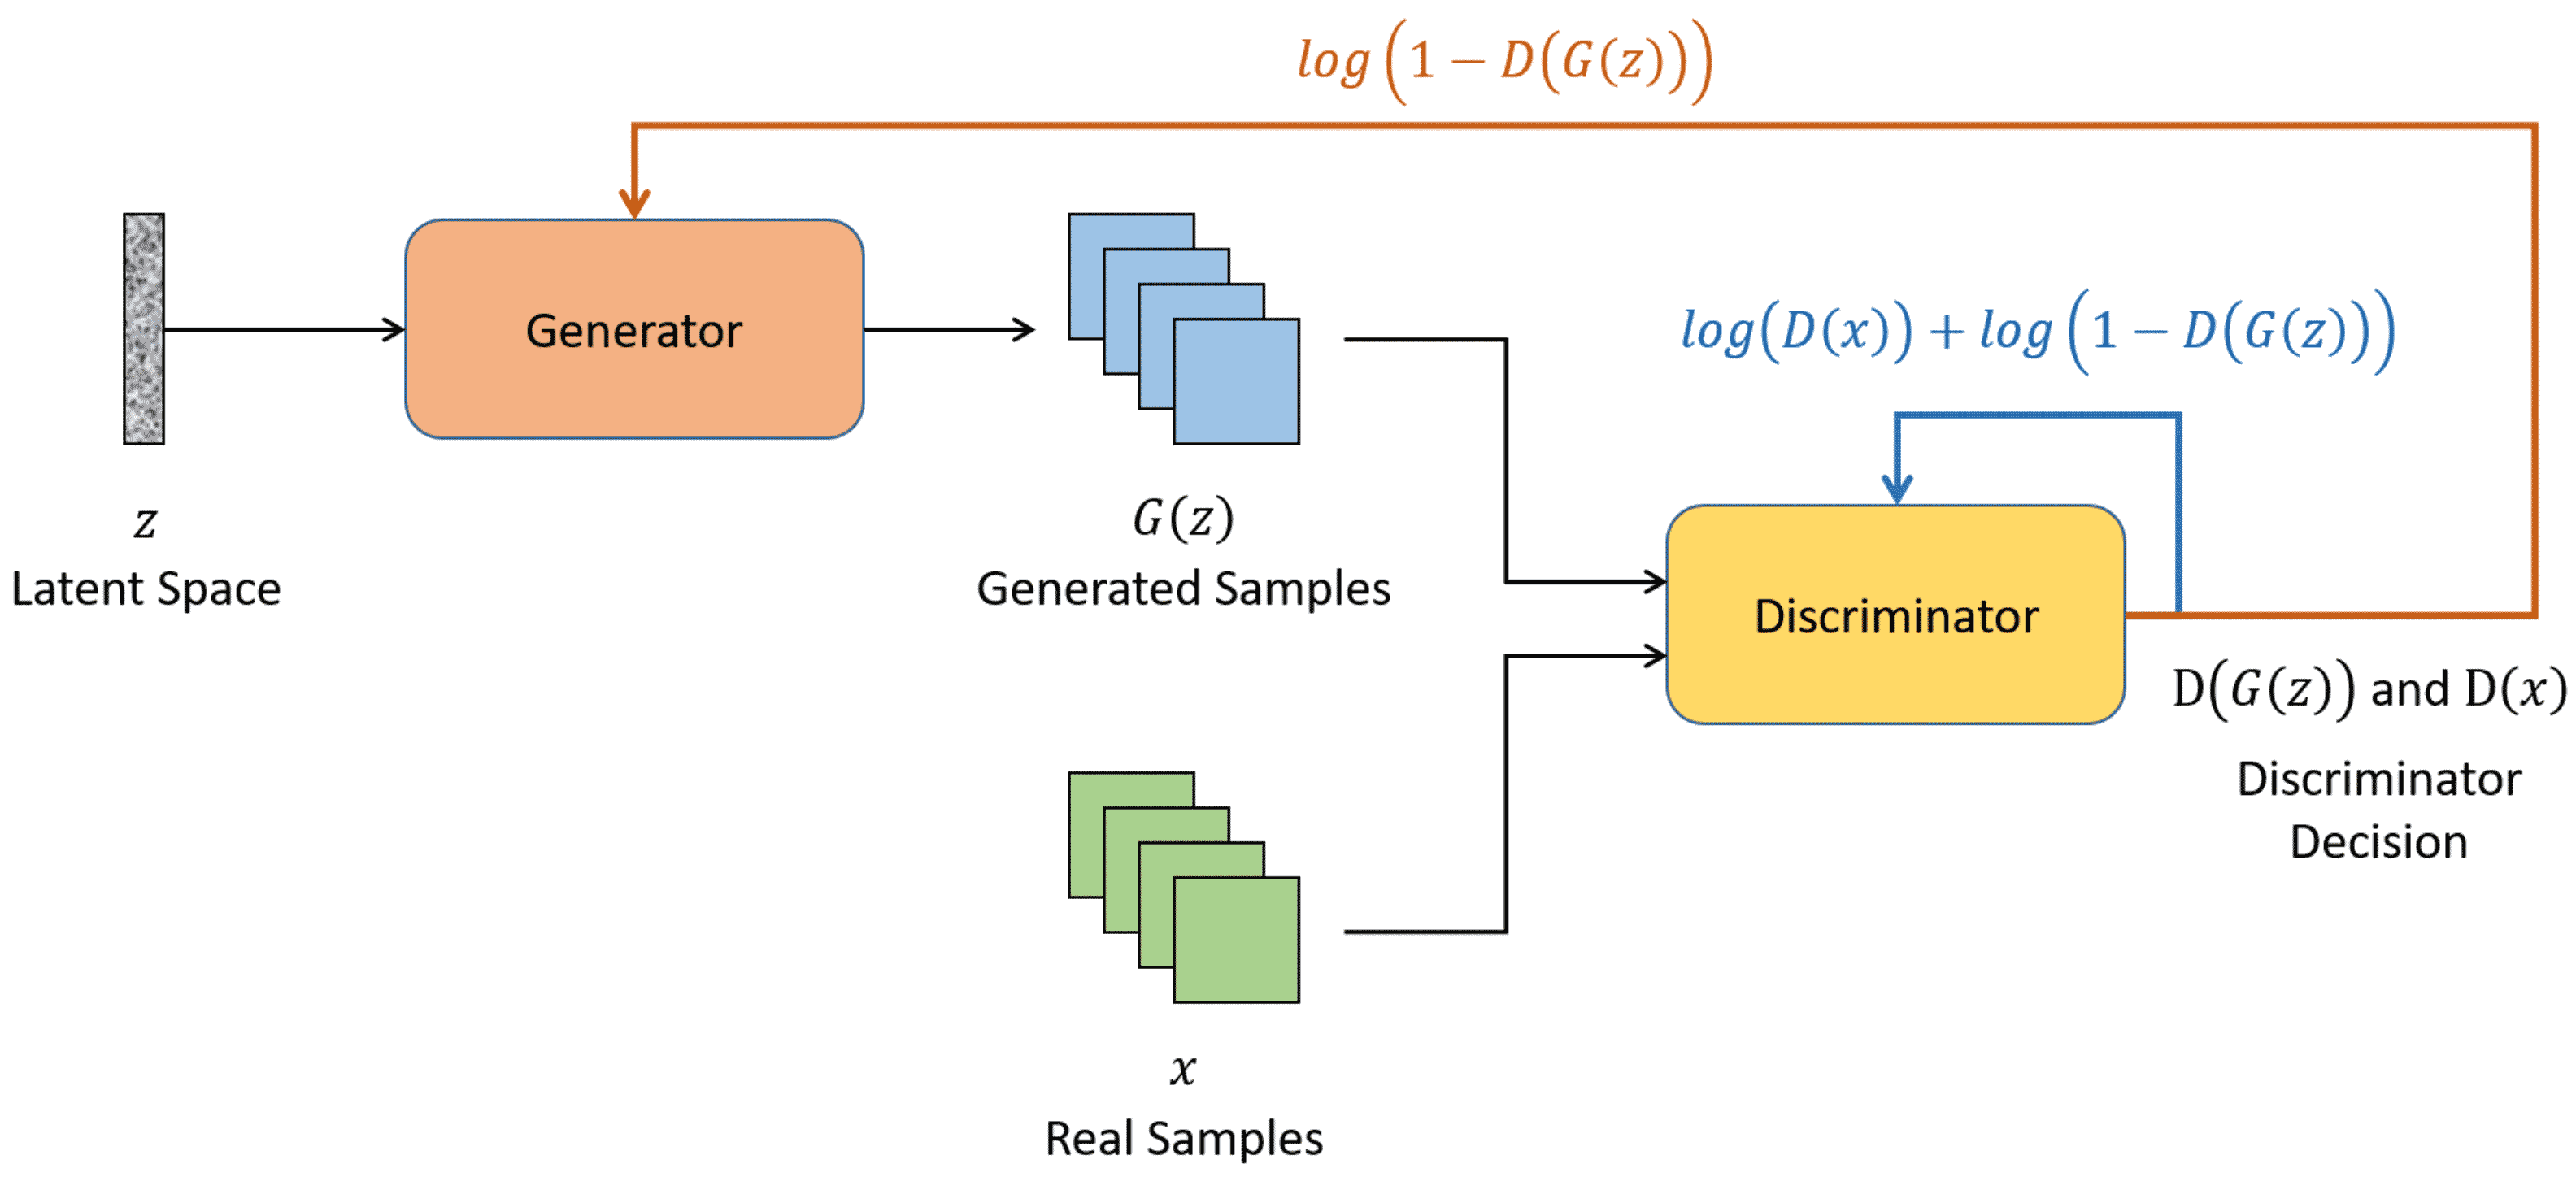

A GAN has two parts: A generator that generates image outputs from random input data and a discriminator that is given actual data and tells the difference between the actual images and that produced by the generator. The data generated by the generator acts as negative training examples for the discriminator and it penalizes the generator for creating unrealistic instances. Over time, the generator and discriminator get better at their jobs by competing with each other and at convergence, the discriminator should have 50% accuracy of prediction, then we can say that the generator has succeeded successfully.


**Advancements**

---

GANs are still an emerging technology and have a wide scope of research, but over recent years, there have been significant advancements in this field. The most prominent include:

*   Improved stability: GANs are extremely difficult to train perfectly and face many problems like vanishing gradient, fleeting convergence, and mode collapsing into degenerate models. Recent works have focused on finding optimal solutions to such problems. These remedies include:

 1.   Wasserstein loss: To train the discriminator without getting stuck in a local optimum, hence solving vanishing gradients as well as mode collapse.
 2.   Unrolled GANs: To use the current output as well as outputs from the future generation of discriminators, so the generator does not get stuck on over-optimizing a single instance.
 3.   Minibatch Discrimination: To prevent the generator from collapsing, entire mini-batches are discriminated against rather than individual samples.

*   Improved realism: Due to extensive advancements in technology and resources, GANs can now be trained to generate such realistic images that it is hard to distinguish from real images. These details are critical when it comes to medical applications and hence the practical use of GANs in the medical field has increased extensively.
*   New architectures and applications: GANs have advanced to now be used for text generation, audio and music synthesis and video generation, all of which find a new area for research and applications, especially in the field of medicine as discussed below.

**Applications**

---

In the field of medicine, it is difficult to leverage machine learning models for automation due to the scarcity of data. Medical scans for some rare critical illnesses are inadequate to train models on. GANs find their applications in this area from generating synthetic medical scans to segmenting image scans and synthesizing synthetic drugs, the applications are extremely useful and the scope is promising.
1.	Synthetic medical image scan generation: Due to the scarcity of data in medical image scans, GANs are used to train on fewer data and generate near original instances of this data, the most prominent research including generating brain scans, tumour scans, diabetic retinopathy lesions synthesis and other MRI, PET as well as X-ray scans.
2.	Medical image segmentation: Each detail in a medical scan is critical and hand marking or annotating the data for any radiologist is time-consuming and expensive. The feature extraction and analyzing power of GANs is such that they can be used for such a critical process and hence in the past couple of years, experts have taken to using automated medical image segmentation methods for accurate clinical reading and decision-making. Various medical scans can be processed for this purpose including MRI, CT scans, Ultrasound imaging, X-ray scans and RGB imaging. When talking about specific anatomical scans, GANs find their applications in brain tumour segmentation, cardiac segmentation, liver tumour segmentation, retina diseases segmentation, breast cancer segmentation, skin lesions segmentation, microscopic segmentation, lung disease segmentation, orthopaedic diseases segmentation and multi-organ segmentation.
3.   Synthetic Molecule generation: Researchers have been using GANs to generate models of synthetic molecules and drugs used in medicine and many publications have been made in recent years on this. Due to the criticality of this application, it is not yet extensively used in large sectors but it is proving to be a promising area for development.
These applications may eventually result in an overall reduction in the cost of healthcare, improved automation, improved patient care and massive advancements in medical research.


Credits: [Generative adversarial networks and its applications in the biomedical image segmentation: a comprehensive survey](https://link.springer.com/article/10.1007/s13735-022-00240-x)

**Future Scope**

---

One of the benefits of GAN models is their potential to generate high-quality clinical snapshots from low-quality or incomplete statistics. This can assist to improve the accuracy of clinical diagnoses and remedy plans, specially in cases in which the acquisition of super images is challenging. GAN models can also be used to generate artificial statistics that can be used to educate system learning models, which could assist improve the accuracy of scientific photo evaluation and analysis. Another region where GAN models are expected to have a good sized effect is in personalized medication. By using GAN models to generate patient-specific photos, doctors can understand the precise characteristics of every patient's condition and develop personalised treatment plans. This can lead to more correct diagnoses, better treatment outcomes, and in the long run, progressed patient care. GAN models can also be used to enhance the efficiency of clinical imaging by lowering the amount of records that needs to be acquired, processed, and analyzed. This can help reduce the time and price related to medical imaging, making it more reachable to patients and healthcare companies. The future scope of GANs in the medical field thus includes personalized medicine for patients, the discovery of drugs, surgical planning and virtual education for patients or medical students.

Credits: [GAN review: Models and medical image fusion applications](https://www.sciencedirect.com/science/article/abs/pii/S1566253522001865)

**Code**

---

In [16]:
#Setup
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import tqdm
import cv2
import os
import seaborn as sns
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, Reshape, Input, Conv2DTranspose
from keras.layers import Activation, LeakyReLU, BatchNormalization, Dropout, Resizing
from keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import VGG16

import warnings
warnings.filterwarnings('ignore')

try:
    from tensorflow.keras.optimizers import Adam
except:
    from keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [17]:
NOISE_DIM = 100  
BATCH_SIZE = 4 
STEPS_PER_EPOCH = 4000
EPOCHS = 10
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

OPTIMIZER = Adam(0.0002, 0.5)

In [18]:
MAIN_DIR = "../input/brain-mri-images-for-brain-tumor-detection/yes"

In [19]:
#Loading and Preprocessing the Images
def load_images(folder):
    
    imgs = []
    target = 1
    labels = []
    for i in os.listdir(folder):
        img_dir = os.path.join(folder,i)
        try:
            img = cv2.imread(img_dir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (128,128))
            imgs.append(img)
            labels.append(target)
        except:
            continue
        
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    return imgs, labels

In [20]:
data, labels = load_images(MAIN_DIR)
data.shape, labels.shape

((155, 128, 128), (155,))

In [21]:
#Generate 20 random numbers to index images from data
np.random.seed(SEED)
idxs = np.random.randint(0, 155, 20)

In [22]:
X_train = data[idxs]
X_train.shape

(20, 128, 128)

In [23]:
# Normalize the Images
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Reshape images
X_train = X_train.reshape(-1, WIDTH,HEIGHT,CHANNELS)

# Check shape
X_train.shape

(20, 128, 128, 1)

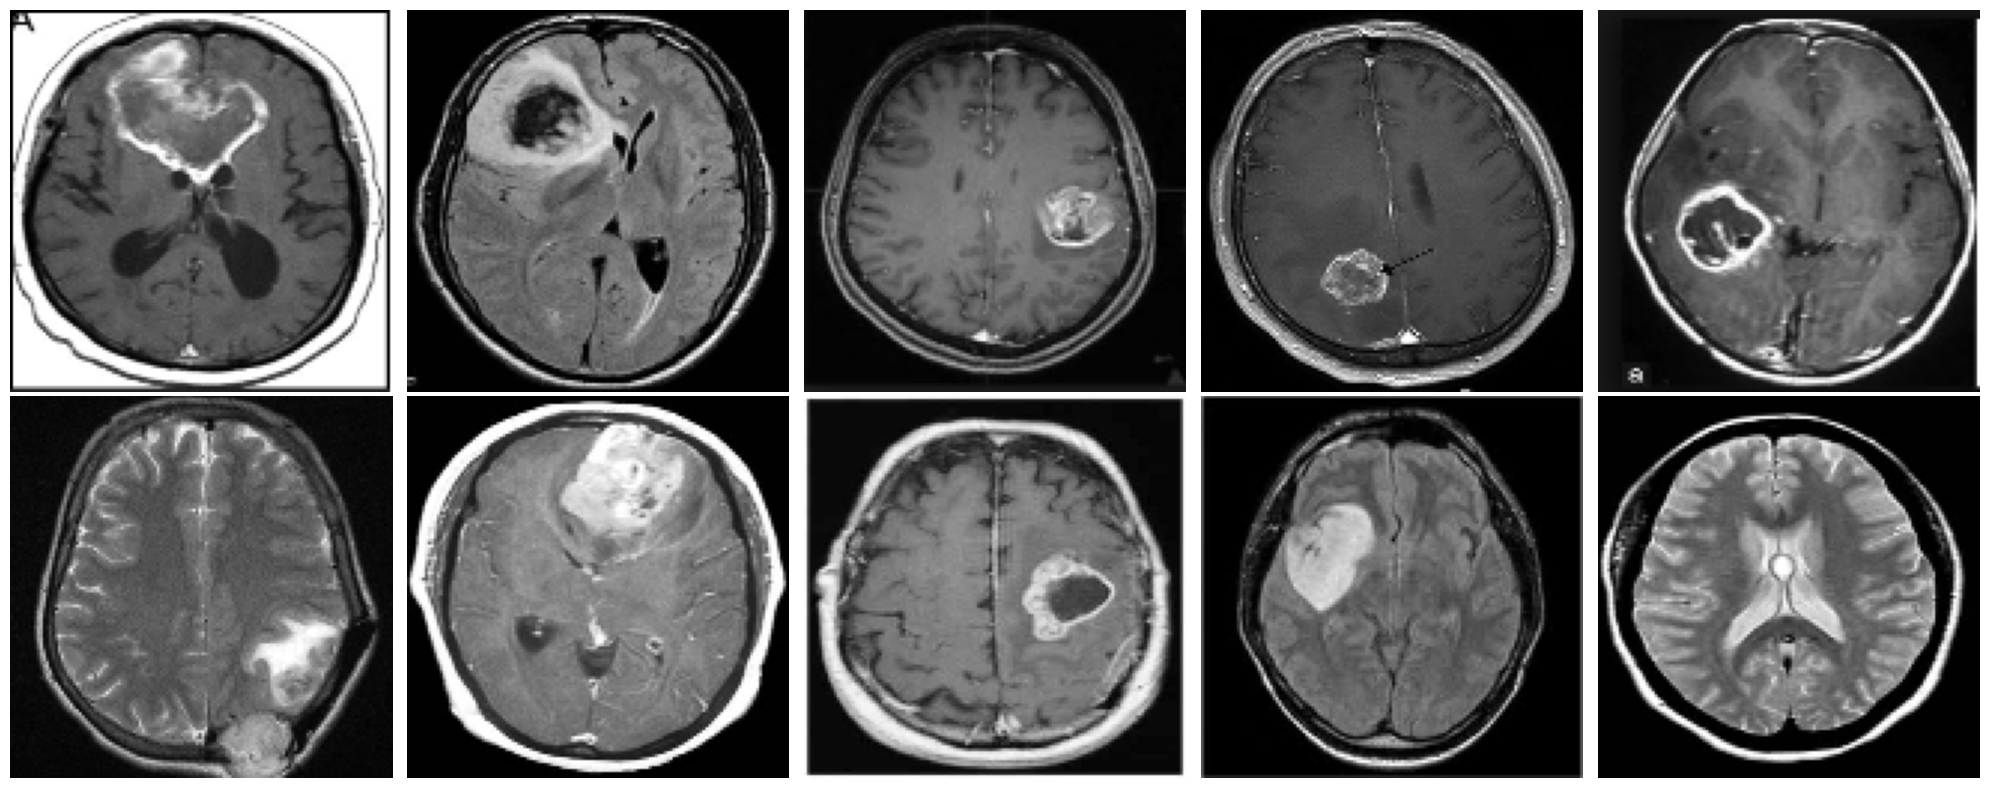

In [24]:
#Plotting The Real Images
plt.figure(figsize=(20,8))
for i in range(10):
    axs = plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

In [25]:
#The Architecture
def build_generator():

    """
        Generator model "generates" images using random noise. The random noise AKA Latent Vector
        is sampled from a Normal Distribution which is given as the input to the Generator. Using
        Transposed Convolution, the latent vector is transformed to produce an image
        We use 3 Conv2DTranspose layers (which help in producing an image using features; opposite
        of Convolutional Learning)

        Input: Random Noise / Latent Vector
        Output: Image
    """

    model = Sequential([

        Dense(32*32*256, input_dim=NOISE_DIM),
        LeakyReLU(alpha=0.2),
        Reshape((32,32,256)),
        
        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh')
    ], 
    name="generator")
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER, )

    return model

In [26]:
def build_discriminator():
    
    """
        Discriminator is the model which is responsible for classifying the generated images
        as fake or real. Our end goal is to create a Generator so powerful that the Discriminator
        is unable to classify real and fake images
        A simple Convolutional Neural Network with 2 Conv2D layers connected to a Dense output layer
        Output layer activation is Sigmoid since this is a Binary Classifier

        Input: Generated / Real Image
        Output: Validity of Image (Fake or Real)

    """

    model = Sequential([

        Conv2D(64, (3, 3), padding='same', input_shape=(WIDTH, HEIGHT, CHANNELS)),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        
        Conv2D(256, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        
        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid", input_shape=(WIDTH, HEIGHT, CHANNELS))
    ], name="discriminator")
    model.summary()
    model.compile(loss="binary_crossentropy",optimizer=OPTIMIZER, )

    return model

In [27]:
#Putting it together
print('\n')
discriminator = build_discriminator()
print('\n')
generator = build_generator()

discriminator.trainable = False 

gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

print("The Combined Network:\n")
gan.summary()



Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)   

In [28]:
def sample_images(noise, subplots, figsize=(22,8), save=False):
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)
    
    for i, image in enumerate(generated_images):
        plt.subplot(subplots[0], subplots[1], i+1)
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')    
                                                                            
        else:
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))
        if save == True:
            img_name = "gen" + str(i)
            plt.savefig(img_name)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [29]:
#The Training
np.random.seed(SEED)
for epoch in range(10):
    for batch in tqdm(range(STEPS_PER_EPOCH)):

        noise = np.random.normal(0,1, size=(BATCH_SIZE, NOISE_DIM))
        fake_X = generator.predict(noise)
        
        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        X = np.concatenate((real_X, fake_X))

        disc_y = np.zeros(2*BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 1

        d_loss = discriminator.train_on_batch(X, disc_y)
        
        y_gen = np.ones(BATCH_SIZE)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f"EPOCH: {epoch + 1} Generator Loss: {g_loss:.4f} Discriminator Loss: {d_loss:.4f}")
    noise = np.random.normal(0, 1, size=(10,NOISE_DIM))
    sample_images(noise, (2,5))

#Generation
noise = np.random.normal(0, 1, size=(100, NOISE_DIM))
sample_images(noise, (10,10), (24,20), save=True)

In [31]:
#Testing Generated Sample
generated_images = generator.predict(noise)
generated_images.shape

4/4 [==============================] - 0s 29ms/step


(100, 128, 128, 1)

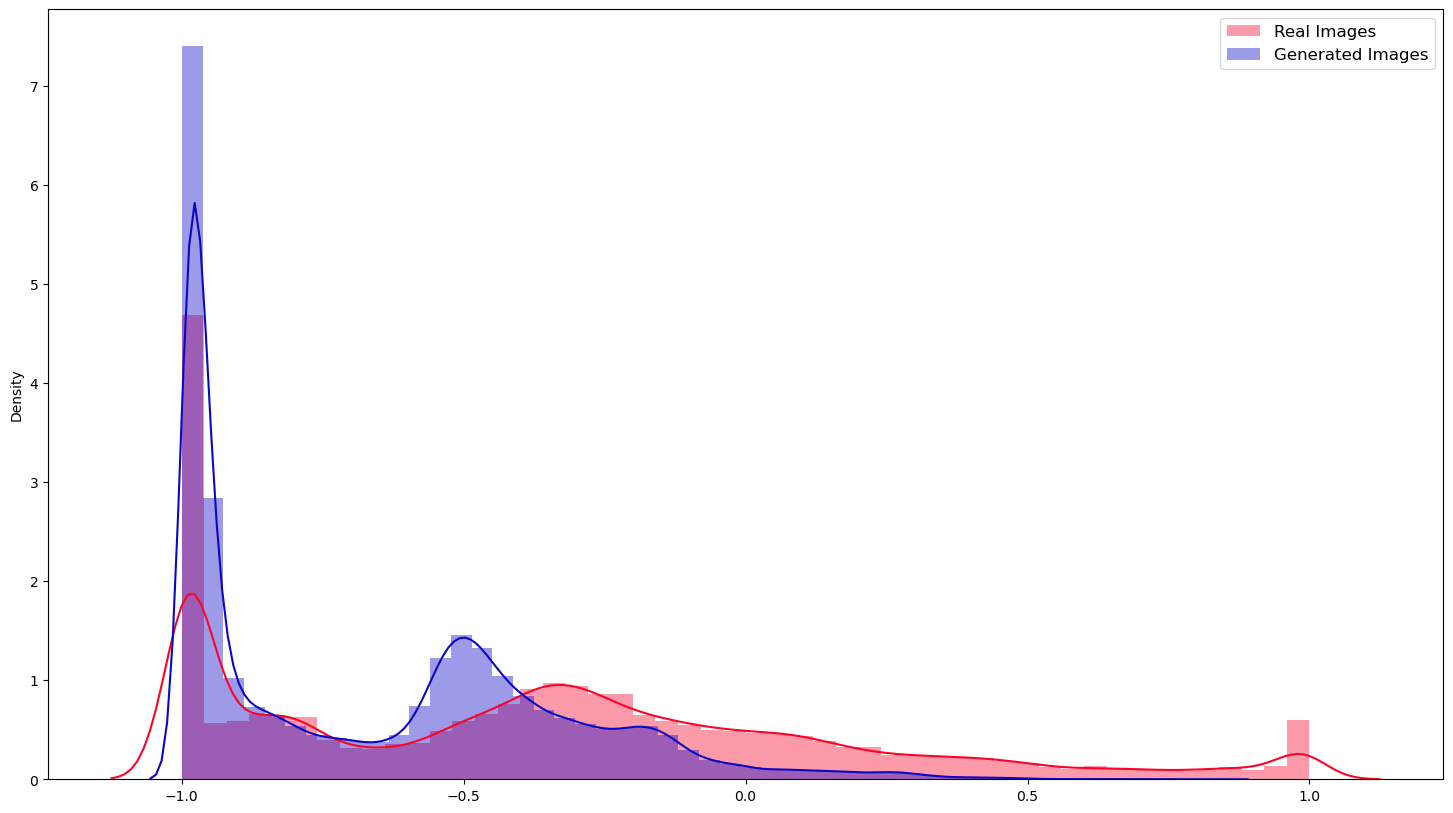

In [32]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(18,10))

sns.distplot(X_train, label='Real Images', hist=True, color='#fc0328', ax=axs)
sns.distplot(generated_images, label='Generated Images', hist=True, color='#0c06c7', ax=axs)

axs.legend(loc='upper right', prop={'size': 12})

plt.show()

Credit: [Generating Brain MRI Images with DC-GAN](https://www.kaggle.com/code/harshsingh2209/generating-brain-mri-images-with-dc-gan/notebook)

# Transformers

**Introduction**

---

Transformers have been very useful and efficient in the Natural Language Processing(NLP) domain, and are quite popular for language-related tasks. The transformer architecture was originally introduced to the world of machine learning in 2017 with the paper “Attention is All You Need”. It is an encoder-decoder model that uses three important concepts:


1.   Positional Encoding: The positions of the elements are added to the input embeddings when they are to be fed to the model. This helps in keeping track of the elements, and knowing the positions of elements concerning each other.
2.   Attention: Since a lot of information is fed that needs to be tracked, certain elements are more important than others. So the transformer model provides the ability to keep the attention on the important elements.
3.  Self-Attention: This establishes a sort of connection between multiple elements of the input which are related to each other, thus helping the model to understand the relationships between the elements.


Credits: https://arxiv.org/abs/1706.03762

CNN-based methods have traditionally been used for image-related tasks. They have the ability to extract the local spatial dependencies within the images very efficiently, but they can’t capture the long-range dependencies. Hence, in order to capture these dependencies and preserving contextual information, the transformer-based methods are getting more popular to solve the medical image-related problems. The tranformer models are often combined with other methods and models to leverage the advantages of various models to perform tasks like segmentation, classification, reconstruction, registration, synthesis, detection, etc.

The paper, "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale", introduced the Vision Transformer (ViT), which is a transformer architecture used to process images without the use of any convolutions.

Credits: https://arxiv.org/pdf/2010.11929.pdf

**Architecture**

---

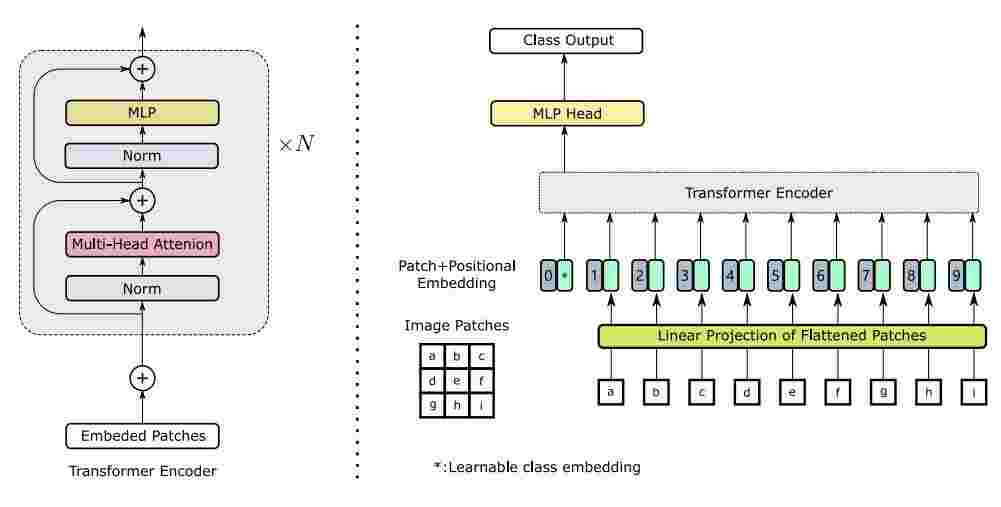

In Vision Transformer, the images are first transformed into image patches. The patches can be overlapping too, and the amount of this overlap can be determined by the size of these patches and the value of the stride. These patches are vectorized (converted to a vector) and passed through a dense layer. Now, the positional encodings are added to the vectors, so the resulting vector can represent the content as well as the position of the patch.

There is a CLS token, which is appended to the beginning of the input sequence at this point and is later used for classification purposes. This resultant sequence of vectors is then passed into a transformer encoder network.

The transformer encoder network comprises of a series of multi-head self attention layer followed by a dense layer. The vector obtained by the CLS token is then used for classification problems by being passed through a softmax classifier. This method requires a huge amount of data for pre-training, followed by data for fine-tuning, and finally data for testing the model. Skip-connection and normalization can be used to increase the efficiency of the model.

**Advancement**

---

DeiT is a shortened form of ViT that is intended to be more data and computationally efficient by solving the need of ViT for a very large training dataset. A smaller Deit model is trained by a larger ViT model using a teacher-student distillation approach. The model has produced great results on several image classification benchmarks, including ImageNet, and has shown promising results in medical image analysis applications like as brain tumour segmentation.

Credits: https://arxiv.org/abs/2012.12877

Furthermore, Swin Transformer is a hierarchical model that builds representations by combining neighbouring patches in further Transformer layers. To capture long-range dependencies in input pictures, it employs shifting window attention, a modified self-attention technique and a patch merging layer at the end. Swin Transformer blocks, which contain sub-layers for self-attention, cross-attention, feed-forward processing, and layer normalisation, make up the model. It solves the high computational power problem of ViT. Hence they are often used for high resolution images.

Credits: https://arxiv.org/abs/2103.14030

**Application**

---

* A lot of work and research has been done in the medical image classification
domain, and the models used are either pure transformers or hybrid transformers. Here, pure transformers comprise of those models which have architecture and structure similar to ViT. They were used to discern and identify different types of cancers, brain age, melanoma, etc.  through CT scans, MRI, X-ray, ultrasound, histopathology images and various other sources.
Hybrid transformers have been used in addition to convolutions, which help in giving attention to the local texture and extracting features, and graphs, which have been used especially in the field of network neuroscience to study the brain.
A lot of work has been done to diagnose COVID-19 too, and this was done using CT scans, X-rays and even ultrasound clips, and since a large dataset was available for this purpose, they have been able to achieve high accuracies.

* Medical image segmentation has been performed with the help of hybrid transformers and pure tranformers. Researchers have usually tried to insert transformer layers in the U-net architecture at different depths, merge transformers and CNNs, and use multi-scale features or attention mechanisms. Models like Trans-UNet and MissFormer have also been introduced, which implement Swin-Transformer and transformer blocks respectively.

* In recent years, GANs have been used to tackle image synthesis problems. They often employ the encoder-decoder structure of the transformer, or use transformer blocks in their architecture. There has been research on generating PET(Positron Emission Tomography) images from MRI images (by using BERT in GAN, termed as GAN-BERT), and the reconstruction of high-quality PET images at a low-dose. Residual learning and Swin-transformers has also been implemented to make efficient models for image denoising and image synthesis.

* ViT and Swin transformer have been used in the models for the purpose of image registration, which is the process of aligning two or more images in order to infer more information. Transformers have also been used for the purpose of video processing, in order to overcome the limitation of CNN to not identify long-term relationships.

Credits: https://arxiv.org/pdf/2202.12165.pdf

**Future Scope**

---

* Hybrid Models: Creating models that merge several types of transformer variations and convolutional neural networks (CNNs) to make use of the strengths of both techniques. Incorporating other techniques like GANs and UNets can also be explored more.

* Multi-Modal Analysis and Image Registration: Investigating the use of transformers for evaluating multi-modal medical pictures, in which data obtained from several imaging techniques is combined to increase diagnosis accuracy and allow for a thorough analysis.

* Image Synthesis and Reconstruction: This involves producing high-quality medical pictures from low-quality or missing data, hence improving image quality and providing beneficial visualisations.

* Handling various size of Datasets: Creating transformer-based models that can handle large-scale medical imaging collections, which are essential for deep learning model training, and transformers can provide scalable solutions for fast processing and analysis. And also employing techniques that can successfully work even on comparatively small datasets.
* Image Segmentation: This involves determining and separating specific regions of interest within medical imaging to aid in diagnosis, treatment planning, and disease quantification.


# U-Net

**Introduction**

---



**UNеt**, a dееp lеarning framеwork, has еmеrgеd as a powеrful tool for mеdical imagе sеgmеntation. In this еssay, wе will еxaminе UNеt dеsign, implеmеntation, and applications in mеdicinе, rеcеnt dеvеlopmеnts, kеy industry contributions, and futurе dеstinations for thеsе tеchnologiеs.

**Unet Model Architecture**

---



UNеt was introducеd in 2015 by Ronnеbеrgеr еt al , as a convolutional nеural nеtwork (CNN) for biomеdical imagе classification. It is a modifiеd U-shapеd systеm capablе of accuratеly classifying mеdical imagеs with minimal training information. Thе UNеt systеm consists of an еncodеr and a dеcodеr. Thе еncodеr еxtracts fеaturеs from thе input imagе, whilе thе dеcodеr crеatеs a pixеl-wisе sеgmеntation map. Thе uniquе charactеristic of UNеt is to skip thе communication bеtwееn еncodеr and dеcodеr, which hеlps to prеsеrvе low and high frеquеnciеs during thе dеlivеry procеss.

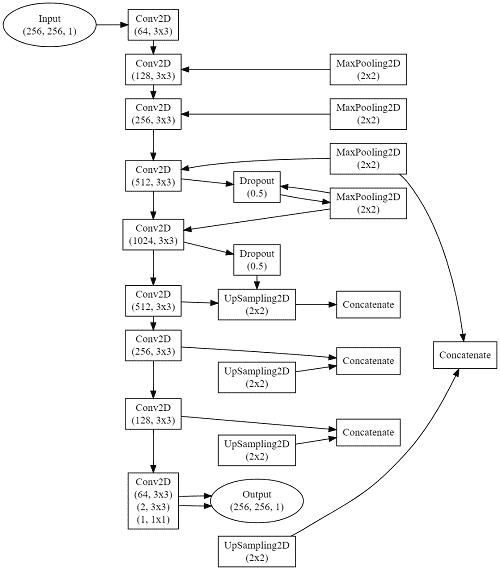

The figure above uses the U-Net algorithm for image classification using keras. Here is a description of the different features and functions of the code.

The program accepts two arguments:
1. pretrained_weights: Path to the pretrained weights that can be used to initialize the model.
2. input_size: The size (height, width, channels) of the input images in the format. By default, it is set to (256, 256, 1) for grayscale images.
The function returns a collection of U-Net samples.

The encoder part of the U-Net has many convolutional layers with a minimum number of filters and max pooling operations.
Each convolutional layer is followed by a ReLU activation function using 'equal' padding and a 'he_normal' kernel initializer.
Stumbling blocks:

The encoding layer is followed by a dropout layer with a dropout rate of 0.5, followed by a 2x2 max pooling operation.
Then, two additional convolutional layers are used to capture more complex features.

The decoder part of U-Net contains several upsampling and convolutional layers.
Upsampling layers is done by 2x2 upsampling using bilinear interpolation.
Skip connections are created by combining the corresponding feature maps from the encoder side with the upsampled feature maps in the decoder.
After each merger, two convolutional layers with ReLU activation are applied.

The final convolution layer consists of 2 filters followed by a 1x1 convolutional layer with a sigmoid activation function.
A sigmoid function gives a probability map of the probability that each pixel belongs to the foreground class (segmentation mask).
The models are clustered using the ADAM optimizer with the number of classes 1e-4 and a binary cross-entropy loss function.

If pretrained_weights is given, the function places weights in the model before returning.


**U-Net Advancements over the past 2 years**

---



1. Efficient U-Net: It specializes in enhancing the performance of U-Net architectures through employing green constructing blocks in conjunction with inverted residual blocks and squeeze-and-excitation modules. It targets to lessen the computational complexity while retaining excessive segmentation performance.

2. Attention U-Net: It consists of interest mechanisms into the U-Net shape to selectively emphasize informative functions and suppress inappropriate ones. This allows beautify the model's capacity to focus on relevant photo regions and beautify segmentation accuracy.

3. Attention Dense U-Net: It combines the standards of interest mechanisms and dense connections. It carries dense pass connections to beautify statistics flow and interest mechanisms to capture long-range dependencies, primary to progressed segmentation outcomes.

4. Cascade U-Net: It introduces a cascaded structure that includes a couple of U-Net modules. Each module is knowledgeable sequentially, with the output of one module serving because the enter to the subsequent. This cascaded method permits for added refined and correct segmentation effects.

5. Hybrid U-Net: It integrates extraordinary deep gaining knowledge of models, collectively with U-Net, convolutional neural networks (CNNs), and transformers, proper into a unified structure. This hybrid method leverages the strengths of each version to enhance segmentation standard overall performance and seize each neighborhood and international contextual information.



**Applications**

---



1. Organ Segmentation: U-Net has been widely used for organ segmentation in medical imaging. It can accurately describe organs such as the brain, liver, heart, kidneys and lungs from imaging modalities such as MRI and CT scans. Accurate organ segmentation allows better visualization, volume analysis, and surgical planning.

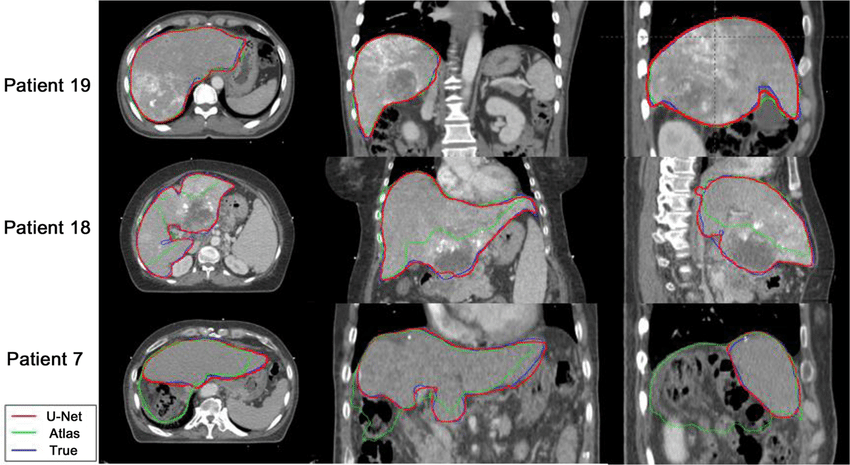

The figure above is the comparison of liver contours in three testing cases. The U-Net-based segmentation (red), the atlas-based segmentation (green), and ground-truth manual contouring (blue) are shown.

Credit - https://www.researchgate.net/figure/Comparison-of-liver-contours-in-three-testing-cases-The-U-Net-based-segmentation-red_fig4_340557066

2. Tumour detection and separation: U-Net has shown great success in tumour detection and separation. It can detect and classify tumours in medical images, allowing radiologists and oncologists to assess tumour size, location and shape for diagnosis, treatment planning and monitoring cancer treatment progress

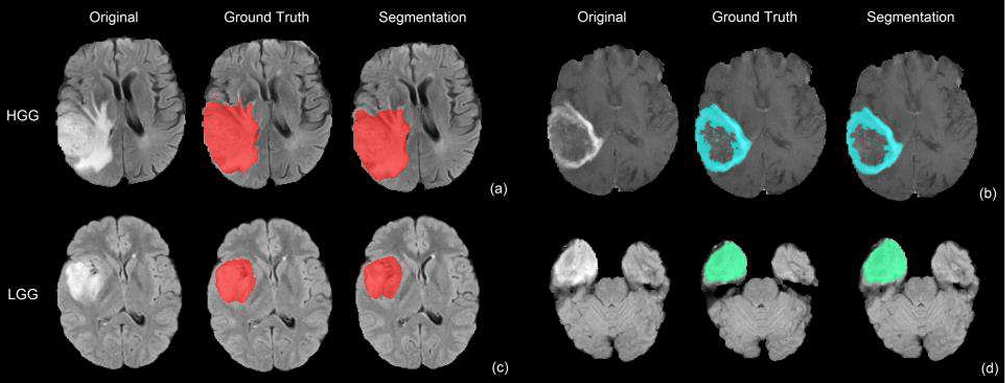

The figure above shows segmentation results for simulated HGG and LGG cases compared to manual reference ground truth; (a) Whole tumour (red) cut from the HGG case overlaid on the FLAIR image; (b) Segmented enhancement tumour (cyan) with overlaid HGG expression on the T1c image; (c) cancellation of the entire LGG case overlay in the FLAIR image (red); (a) Segmented core tumour (green) with LGG case masked in the FLAIR image.

Credit - https://arxiv.org/pdf/1705.03820.pdf

3. Vessel extraction and segmentation: U-Net has been used to extract and segment blood vessels from medical images. Accurate vascular classification is essential for the diagnosis of vascular diseases, planning surgery, and assessment of blood flow patterns. U-Net’s ability to capture details and manage complex container systems makes it a valuable tool in this field.

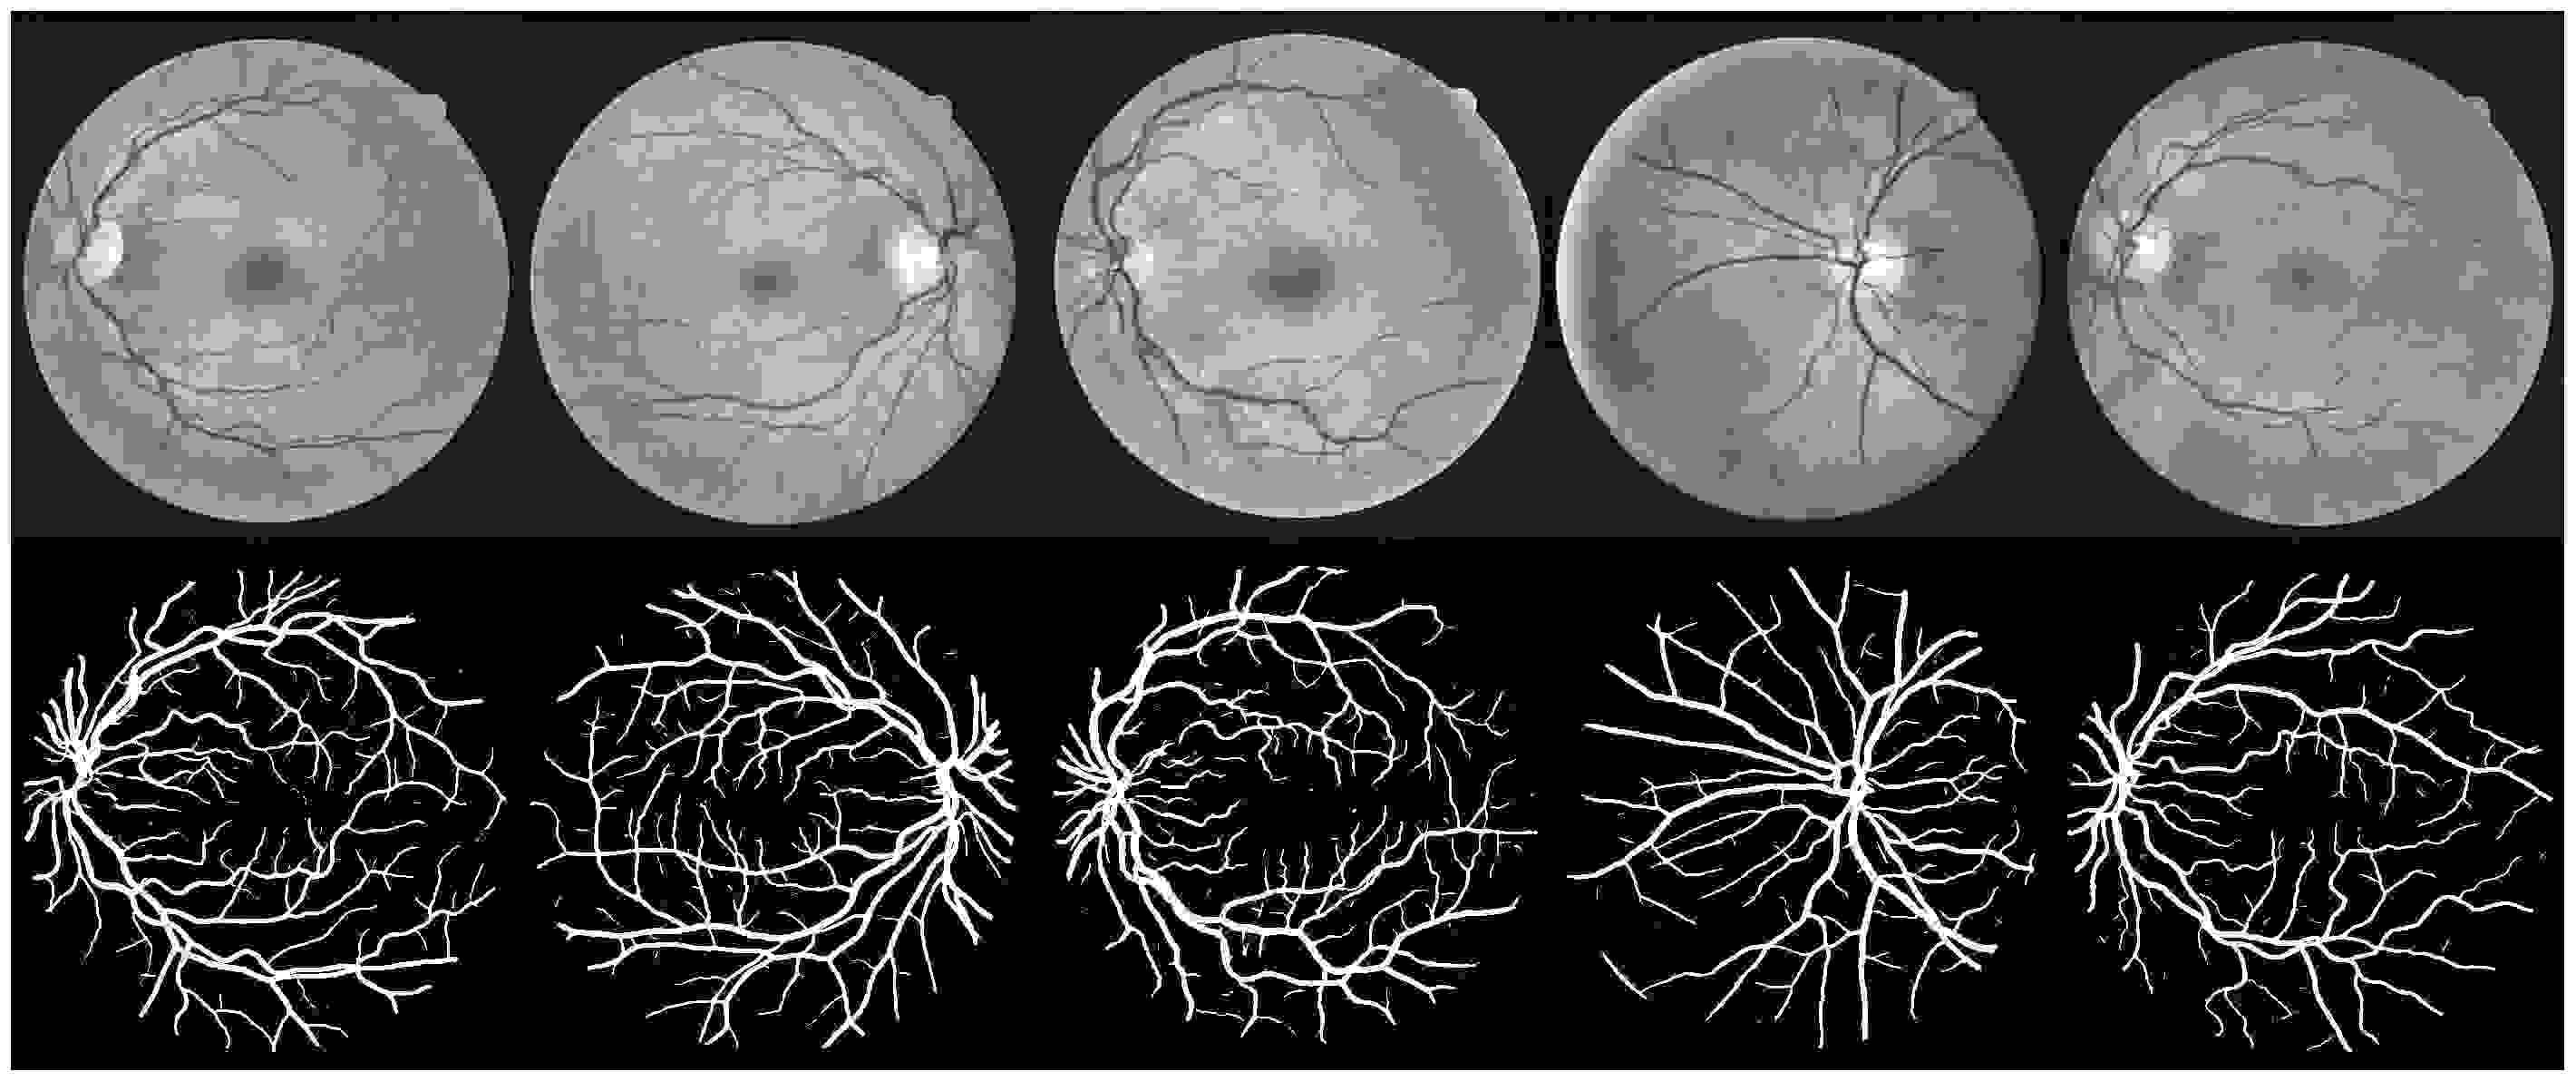

 The figure above show retina vessel segmentation using U-Net. The figure showcases a test retinal image and its corresponding vessel segmentation result obtained using U-Net architecture.

 Credit - https://github.com/DeepTrial/Retina-VesselNet

**Code**

---

Code Snippet on how U-Net is used for mask prediction in nuclei segmentation

Credit - https://github.com/zhixuhao/unet



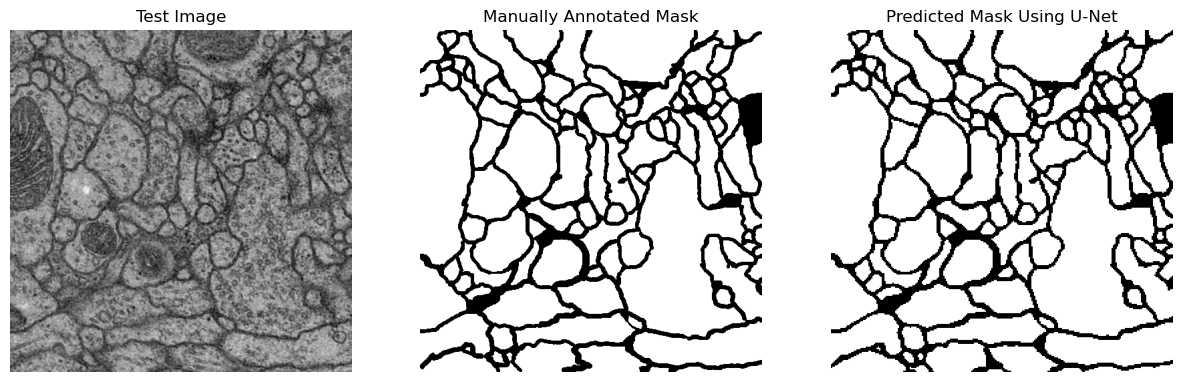

In [33]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the function to preprocess the test image
def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to 256x256
    image = cv2.resize(gray, (256, 256))
    # Normalize the pixel values to the range of 0-1
    image = image / 255.0
    # Add a channel dimension to the grayscale image
    image = np.expand_dims(image, axis=-1)
    return image

# Load the pre-trained U-Net model
model = load_model('/kaggle/input/unet-dataset/Unet_NonDAPIStainedData/unet_membrane.hdf5')

# Define the path to the folder containing test images
test_images_folder = '/kaggle/input/unet-dataset/Unet_NonDAPIStainedData/test/TestImage'

# Get a list of all test images
test_images = os.listdir(test_images_folder)

# Create an empty list to store the predicted masks
predicted_masks = []

# Define batch size and initialize an empty batch of images
batch_size = 32
batch_images = []

# Loop over the test images
for i, image_file in enumerate(test_images):
    # Load the test image
    image_path = os.path.join(test_images_folder, image_file)
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image)

    # Add the preprocessed image to the batch
    batch_images.append(preprocessed_image)

    # If the batch is full or it's the last image, predict the segmentation masks
    if len(batch_images) == batch_size or i == len(test_images) - 1:
        # Convert the batch of images to a numpy array
        batch_images = np.array(batch_images)

        # Predict the segmentation masks for the batch of test images
        batch_predicted_masks = model.predict_on_batch(batch_images)
        batch_predicted_masks = (batch_predicted_masks > 0.5).astype(np.uint8)

        # Append the predicted masks to the list
        predicted_masks.extend(batch_predicted_masks)

        # Clear the batch of images
        batch_images = []

# Loop over the predicted masks and test images for visualization
for i in range(1):
    # Load the test image
    image_file = test_images[i]
    image_path = os.path.join(test_images_folder, image_file)
    image = cv2.imread(image_path)

    masks_folder = "/kaggle/input/unet-dataset/Unet_NonDAPIStainedData/test/Manually_Annotated_Mask"

    # Load the manually annotated mask
    mask_file = os.listdir(masks_folder)[i]  # Assuming i corresponds to the image index
    mask_path = os.path.join(masks_folder, mask_file)
    manually_annotated_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Create a figure with subplots
    plt.figure(figsize=(15, 5))

    # Display the test image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Test Image")
    plt.axis("off")

    # Display the manually annotated mask
    plt.subplot(1, 3, 2)
    plt.imshow(manually_annotated_mask, cmap="gray")
    plt.title("Manually Annotated Mask")
    plt.axis("off")

    # Display the predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i][:, :, 0], cmap="gray")
    plt.title("Predicted Mask Using U-Net")
    plt.axis("off")
    # Show the figure
    plt.show()

**Future Scope**

---



The future of UNet and medical image segmentation looks promising, and there are many avenues for further improvement and development. Here are some of the upcoming trends:

1. Advanced integration: Future UNet developments will include conceptual techniques, graph-based reasoning, and multi-scale context modeling to increase classification accuracy and capture image complexity

2. Processing complex images: UNet will be designed to handle 3D volumes, dynamic image sequences, and more data fusion, using techniques proven by variants such as DU U-Net and Swin-Unet for segmentation performance developed.

3. AR and VR applications: Integrating augmented reality and virtual reality, Unet will enable interactive and watermarking experiences, supporting surgical guidance, accuracy, and educational visualization

4. Special adaptations for medical specialties: Prepare UNet for specific medical areas such as neuroimaging, cardiology, pathology, and radiology, adapting its programs and training methods to meet unique challenges and needs.

# ResNet

**Introduction**

---

**ResNet,** short for Residual Network, is one of the most effective deep learning architectures for image classification.  First developed by ResNet in 2015, it has gained traction for a variety of computer vision applications, including medical imaging. It is a  type of convolutional neural network (CNN) made up of numerous layers of convolutional and pooling processes.

**Architecture**

---

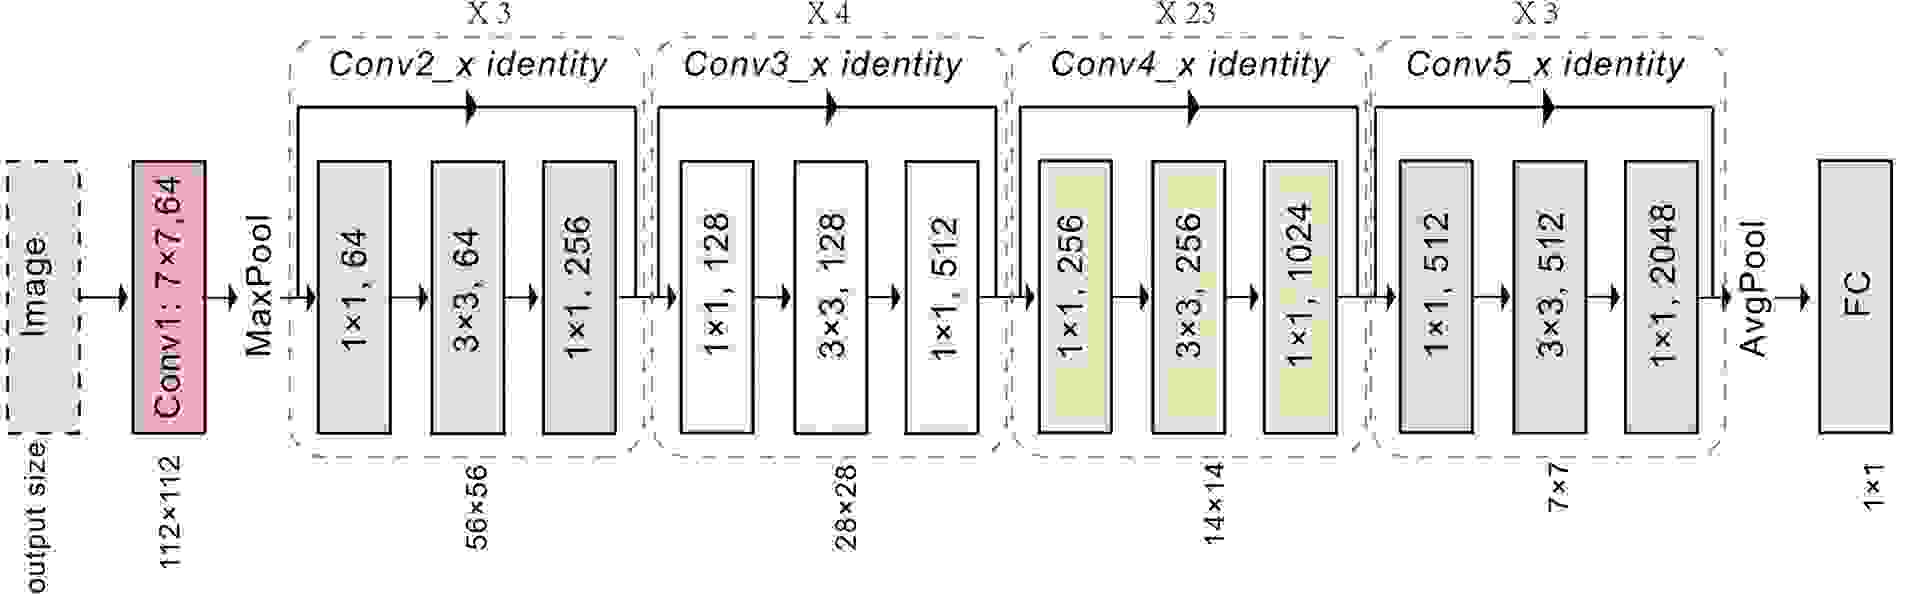

ResNet's primary innovation is the use of residual connections, often referred to as skip connections, which enable the network to learn residual functions rather than the underlying mapping directly. This aids in addressing the issue of disappearing gradients, which can affect deep neural networks and impair their capacity to learn intricate characteristics.
Its variants ResNet-18, ResNet-34, ResNet-50, ResNet-101, and ResNet-152, differ in the number of layers and the complexity of the architecture. The deeper variants of ResNet have been shown to achieve state-of-the-art performance on various image classification benchmarks, such as ImageNet. ResNet is mostly employed for image classification, which entails labelling an image by its content, object detection, segmentation, and localization. It works by learning a hierarchy of features from the input image. While the latter layers of the network extract high-level data like forms and textures, the first few layers of the network extract low-level information like edges and corners. ResNet's residual connections enable the network to learn residual functions, which can distinguish between a layer's input and output. As a result, the gradients are propagated more successfully, and the network's training is enhanced. To convert the input image into a feature representation, ResNet combines convolutional layers, pooling layers, batch normalization, and activation functions like ReLU. The completely linked layer receives the feature representation after that, producing the network's final output.


**Advancement**

---

ResNet and its variations have seen several improvements during the last two years. The employment of attention mechanisms, which enables the network to concentrate on the most important aspects of the image, is one of the significant improvements. For instance, the (2018) Squeeze-and-Excitation (SE) block employs a gating mechanism to selectively amplify or suppress the feature maps depending on their significance.
Pre-training and transfer learning, which involves training the network on a big dataset, like ImageNet, and then fine-tuning it on a smaller dataset, like medical images, is another development. It has been demonstrated that this strategy enhances ResNet's performance on medical imaging tasks, particularly when the dataset is small. In recent years, ResNets have become more complex, with some models currently having over 1000 layers. The accuracy of these deeper models is higher for image recognition tasks.
ResNet has been developed and used by several businesses. Consider the pre-trained ResNet models for medical imaging tasks like lung nodule detection and brain tumour segmentation that NVIDIA has built into its Clara deep learning platform. Another business, Arterys, has created a cloud-based platform for medical imaging tasks like cardiac MRI processing that makes use of ResNet.


**Application**

---

In the field of medical imaging, ResNet has demonstrated promising results, particularly in the identification and diagnosis of numerous disorders, including cancer. For instance, ResNet has been applied to the detection of lung cancer from CT scans, colorectal cancer from colonoscopy pictures, and breast cancer from mammograms. As well as classifying skin lesions from dermoscopy pictures, ResNet has been used to segment brain tumours from MRI scans. It can be used to help in disease diagnosis, help in the segmentation of tissues in medical pictures, aid surgical planning and disease progression tracking and find novel medications by analyzing the molecular structures of drugs.ResNet can learn intricate features from images that are difficult to manually extract. It is capable of handling huge datasets with high dimensions, which are usual in medical imaging. This is essential for clinical applications since it generalizes effectively to fresh images.

**Future Scope**

---

ResNet is anticipated to play a significant role in enhancing healthcare outcomes due to the expanding availability of medical imaging data and the rising demand for precise and effective diagnosis. Plans for ResNet in medical imaging include the following:
- Developing ResNet variations that are more accurate and efficient and can handle larger datasets and more challenging tasks.
- Looking at the usage of ResNet for multi-task learning, where the network can carry out several tasks at once, such as identifying and categorizing various cancer types.
- Developing explainable AI methods for ResNet that can aid physicians in comprehending how the network generates its predictions and increase acceptance and trust.
- Integrating ResNet with other technologies, such as robots and augmented reality, to enable interactive and real-time interpretation of medical images.

ResNet is a powerful deep-learning architecture that, in conclusion, has demonstrated considerable promise in the medical industry, particularly in the identification and diagnosis of various disorders. It is anticipated that ResNet will continue to enhance its performance on medical imaging tasks and contribute to the creation of more precise and effective healthcare systems thanks to developments in attention mechanisms, pre-training, and transfer learning.


Credit:
[Deep Learning in Image Classification using Residual Network
(ResNet) Variants for Detection of Colorectal Cancer](https://www.sciencedirect.com/science/article/pii/S1877050921000284)

# VAE

**Introduction**

---

Variational Autoencoder (VAE) is a type of neural network that is capable of learning the underlying distribution of the input data and generating new samples from that distribution. VAEs can learn meaningful representations of complex data and are utilised in a variety of industries including the medical industry.

**Architecture**

---

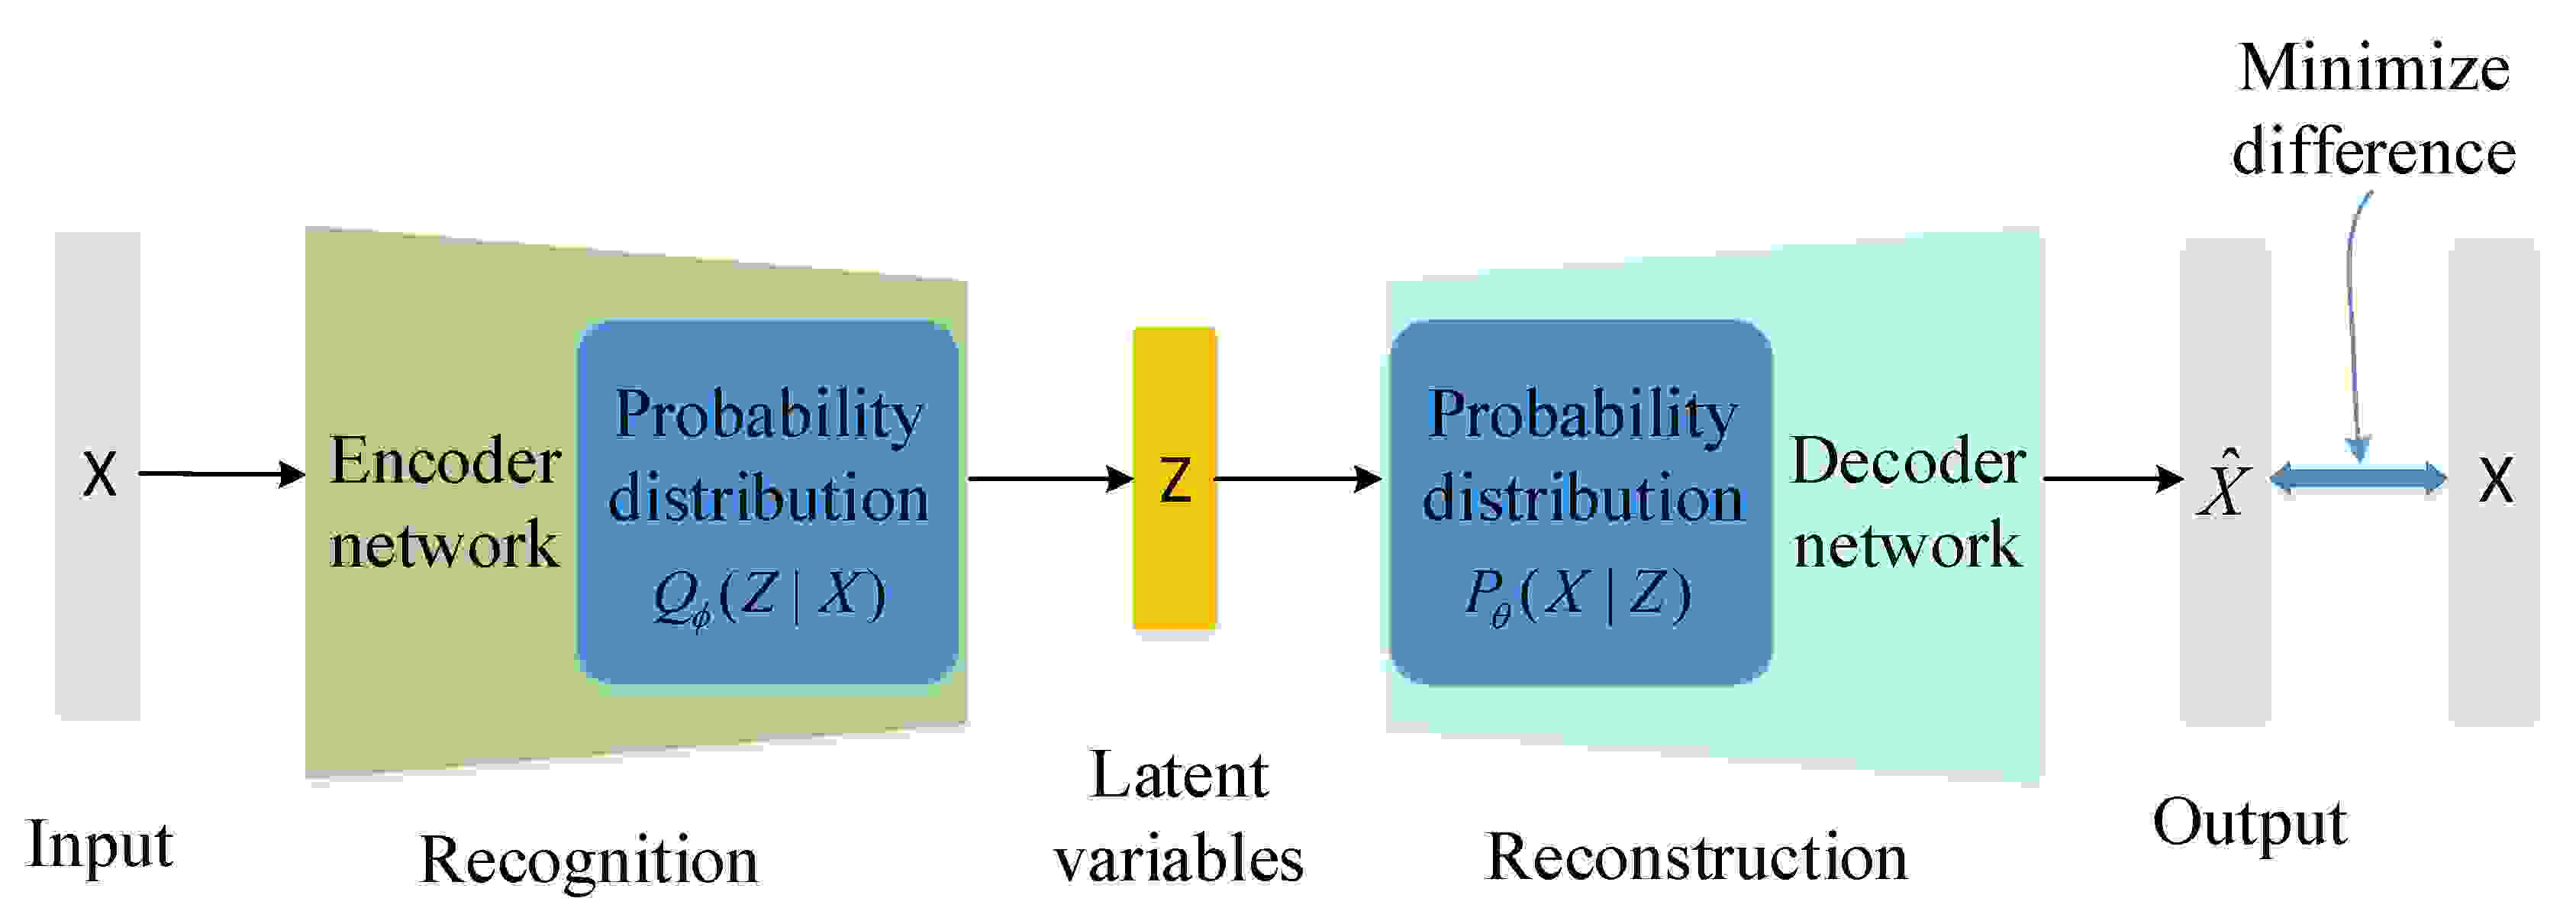

VAEs consist of two fundamental elements: the encoder and the decoder. The input data is mapped into a lower dimensional latent space by the encoder, which then captures the underlying structure and characteristics. The decoder reconstructs the input data using the latent space model. This architecture allows VAE to keep creating fresh samples while learning a compressed representation of the input data. Deep Neural Networks are widely employed as the encoder and the decoder. The main difference between VAEs and traditional autoencoders is that VAEs apply a probability distribution through the latent space. As a result, VAEs can produce new samples by collecting samples from the latent space.
The process is as follows:
1. The VAE is originally trained on a dataset of medical image data.
The input image is encoded into a latent representation through an encoder network.
2. The latent representation is then passed through a sampling layer to generate a new latent representation. The VAE selects a point from the latent space.
3. The new latent representation is then decoded into a reconstructed image through a decoder network using the point.
4. The loss function is calculated as the difference between the input image probability distribution and the reconstructed image probability distribution.
5. The loss is backpropagated through the network to update the weights and biases of the encoder and decoder networks. Along with the reconstruction loss, the Kullback-Leibler (KL) divergence, a regularisation term is also included by the VAE


**Advancements**

---

In the past two years, there have been several developments in the field of VAE.
1. One of the most significant accomplishments is the use of VAE for unsupervised learning, where the model determines the underlying structure of the data without any labels. VAE has been successfully implemented in unsupervised settings for tasks like clustering and anomaly detection.
2. Another significant development is the use of VAE for transfer learning which is the process of using knowledge gained from one activity for accomplishing another activity. VAE has been utilised for transfer learning tasks that include object detection and picture categorisation.
3. Semi-supervised learning which improves performance by training VAEs on both small labelled datasets and larger unlabeled datasets is another area of exploration.



Numerous companies have made significant accomplishments and enhanced both non-medical and medical applications. VQ-VAE is a model developed by Google that is known for creating high-quality images. Google Health has employed VAEs to predict patient outcomes and create synthetic medical data. Facebook Glow can create stunning images and videos. IBM Watson Health has employed VAEs to find anomalies in time series data and medical image data.

**Applications**

---

VAEs have been used for a variety of tasks in the medical field, including:
1. Medical image segmentation: This is the task of dividing an image into different regions that correspond to different structures. VAEs can be used to segment medical images by learning a latent space representation that captures the spatial relationships between different structures.
2. Anomaly detection: This is the task of identifying data points that are abnormal or out of the ordinary. VAEs can be used to detect anomalies in medical images by learning a latent space representation that captures the normal patterns in the data.
3. Disease Diagnosis: This is the task of identifying the presence of a disease in a patient. VAEs can be used to diagnose diseases by learning a latent space representation that captures the features of different diseases.


**Future Scope**

---

1. Personalised medicine: VAEs can be used to examine patient data, including medical imaging, to create individualised treatment recommendations. The development of VAE models that can account for unique patient characteristics and medical histories may be the main focus of future research.
2. Real-time analysis: Because VAEs can be expensive to compute, their usage in real-time medical imaging applications may be constrained. To enhance real-time performance, future research might concentrate on creating more effective VAE architectures or parallelization strategies.
3. Clinical decision support: By examining medical images and offering suggestions for diagnosis and therapy, VAEs can be utilised to enhance clinical decision-making for physicians. The development of VAE models that can successfully interface with clinical decision support systems may be the main topic of future research.
4. Explainability: By using VAEs to give comprehensible representations of medical pictures, practitioners can better grasp the connection between imaging-based characteristics and clinical outcomes. The development of more efficient means of imposing attribute disentanglement and enhancing the interpretability of VAEs in medical imaging could be the main areas of future study.

Medical imaging is only one of the many areas in which VAE has the potential to transform. VAEs have the potential to revolutionize medical imaging by generating fresh images from small datasets. VAEs can additionally help in data compression and feature extraction enabling more efficient data processing. Breast cancer, Parkinson's disease, and Alzheimer's are all key areas of research where VAEs are implemented right now.


Credits: [A new VAE-GAN model to synthesize arterial spin labeling images from structural MRI](https://www.sciencedirect.com/science/article/abs/pii/S0141938221000858)

[Attri-VAE: Attribute-based interpretable representations of medical images with variational autoencoders](https://www.sciencedirect.com/science/article/pii/S0895611122001288)

[CVAD: A generic medical anomaly detector based on Cascade VAE](https://arxiv.org/abs/2110.15811)

# Applications

1. **Multi modal medical image fusion:** This is a technique to combine medical image scans from same or different modalities like MRI, PET, CT scans, X-ray scans into a single fused image to provide more detailed information about the organ. This application helps doctors understand the scan much effectively and hence makes it easy to diagnose diseases. Further, the fused image may help enhance functioning of other tasks like segmentation and classification.
This application however is implemented using various algorithms and techniques, the most prominent of which are based on decomposition by applying transform of some kind and then fusing the images using neural networks and reforming the fused image by applying the inverse transform. These decomposition based methods can be further achieved by using Wavelet transform, Pyramid transform, Curvelet transform, Contourlet transform, Ridgelet transform or Shearlet transform.
Over the past 2 years, there has been a significant increase in the research publications in this area as well as a number of advancements too, including:
  *    Development of new fusion algorithms: New algorithms have been developed that are more effective at combining inter-modal images using machine learning or deep learning techniques.
  *   Use of large datasets: Due to a significant increase in the datasets of medical image scans, fusion algorithms have improved in terms of output quality as well as they have become more robust to noise.
  *   Massive improvement in output quality: Advancements in technological resources have greatly improved the quality of fused images in terms of pixel quality, noise suppression and minimal loss of important features.

  As mentioned above, there has been a tremendous increase in the number of review articles as well as specific research advancements on particular organs, especially tumors of brain, breast, prostrate, ovaries, liver and diagnosis and treatment of various organs like eyes, lungs along with diseases like Alzheimer’s. The extensive progress in this technique along with newfound power of technological resources make this field of application a promising area worth investing and researching in.

Credits: [Multimodal medical image fusion review: Theoretical background and recent advances](https://www.sciencedirect.com/science/article/abs/pii/S016516842100075X)

2. **Surgical planning** is the procedure of having organized for a surgical treatment with the aid of searching at the patient's clinical history, performing a bodily examination, and using imaging techniques to make a specific plan for the surgical treatment. Making positive the method is secure, effective, and least invasive is the primary objective of surgical planning.
Virtual surgical making plans and 3-D printing have converted oral and maxillofacial surgical operation in latest years. With the help of these technologies, surgeons may produce unique fashions of the anatomy of the affected person, bearing in mind extra accurate making plans and execution of surgical treatments. CT pictures, MRI scans, and 3D fashions produced the use of 3-D printing technology are the most common fashions employed in surgical making plans. While MRI scans serve to view the patient's inner organs and tender tissues, CT scans provide targeted photos of the patient's bones and gentle tissues. Surgeons have get admission to to the patient's anatomy in 3 dimensions thanks to 3-D fashions made with 3-d printing era, which allows them plan and perform surgical methods extra precisely. Over the beyond  years, advances in surgical making plans have been targeting growing the precision and effectiveness of surgical treatments. For example, researchers have evolved new software equipment that permit surgeons to construct digital models of the anatomy of the patient, taking into account extra particular making plans and execution of surgical treatments. Additionally, new 3-d printing strategies and materials have been created, enabling surgeons to produce greater unique and thorough replicas of the anatomy in their sufferers.
The future of surgical planning is exceptionally huge, and many charming advances are inside the works. To analyze clinical snap shots and expand more particular fashions of the patient's anatomy, researchers are investigating using artificial intelligence and machine studying algorithms. The development of latest 3D printing strategies and substances will also permit surgeons to construct more complex and comprehensive representations of the anatomy in their patients. In conclusion, surgical planning is a vital component of oral and maxillofacial surgical procedure, and current tendencies in 3-D printing and digital surgical making plans have completely changed the sphere. With the aid of these technology, surgeons may additionally produce unique models of the affected person's anatomy that may be used to greater exactly plan and carry out surgical procedures. The cognizance of surgical making plans advancements during the preceding  years has concentrated on improving the precision and effectiveness of surgical remedies, but there are nonetheless many promising advances in watching for the field within the destiny.

Credits: [3D Printing and Virtual Surgical Planning in Oral and Maxillofacial Surgery](https://www.mdpi.com/2077-0383/11/9/2385)

# Conclusion

This report has given an in-depth overview of the developments in AI-powered image and video analysis in the field of medicine over the last two years. Medical imaging, diagnosis, and treatment have witnessed a revolution owing to the integration of AI, ML, and DL technologies that which has increased accuracy and patient outcomes. We researched several AI techniques, such as Generative Adversarial Networks, Transformers, ResNet, U-Net, and Variational Autoencoder (VAE), highlighting their architectures, analyzing their use cases, recent advancements, and future possibilities through a study of research publications and trends. We've additionally discussed some well-known uses of image/video analysis in medicine: multi-modal medical image fusion, and surgical planning. These applications have seen significant improvements, such as the introduction of novel fusion techniques, the use of huge datasets, and a substantial enhancement in output quality. With continuous research in artificial intelligence, machine learning algorithms, and 3D printing techniques for more precise anatomical models and surgical planning, the future holds enormous potential. The rapid advancement and promising opportunities in AI-driven image and video analysis are highlighted in this report's conclusion, opening the door for groundbreaking medical advances.